11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
2143/2143 [==============================] - 11s 5ms/step - loss: 0.1129 - val_loss: 0.0768
Epoch 2/5
2143/2143 [==============================] - 11s 5ms/step - loss: 0.0734 - val_loss: 0.0703
Epoch 3/5
2143/2143 [==============================] - 11s 5ms/step - loss: 0.0697 - val_loss: 0.0684
Epoch 4/5
2143/2143 [==============================] - 11s 5ms/step - loss: 0.0683 - val_loss: 0.0675
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


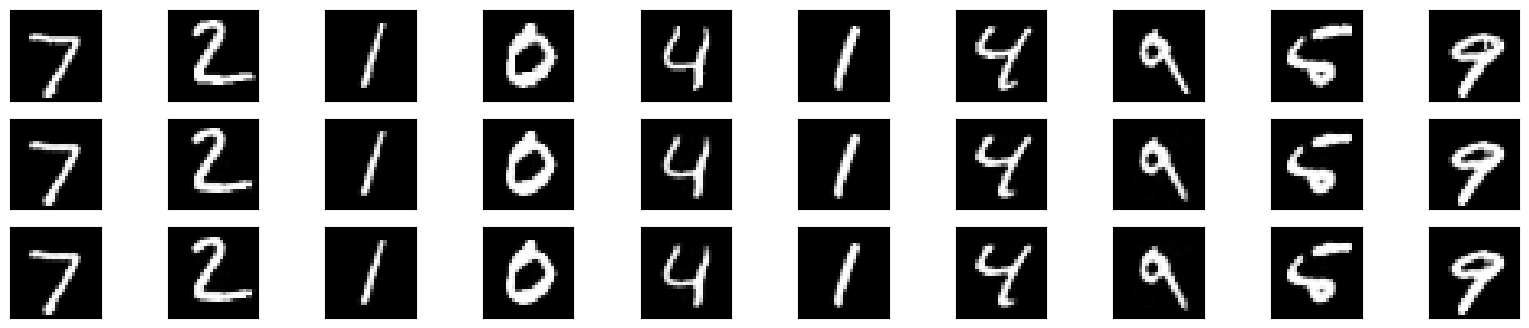

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=28, shuffle=True,
validation_data=(x_test, x_test))
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(encoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 ax = plt.subplot(3, n, i + 1 + 2 * n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()